In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.3.0'

In [4]:
tf.keras.__version__

'2.4.0'

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_train , y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
import matplotlib.pyplot as plt

9


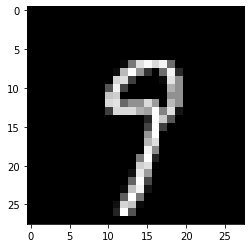

In [12]:
plt.imshow(x_train[1500],cmap="gray")
print(y_train[1500])

In [13]:
x_train[1500].shape

(28, 28)

In [14]:
print(x_train[1500])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 120 223 249 217 244
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 186 254 149  5

In [15]:
import numpy as np

In [16]:
alist = np.array([1,5,10,100,200,255])

In [17]:
alist

array([  1,   5,  10, 100, 200, 255])

In [18]:
alist/255

array([0.00392157, 0.01960784, 0.03921569, 0.39215686, 0.78431373,
       1.        ])

In [19]:
x_train = x_train/255

In [20]:
x_train[1500]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [21]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
blist = np.array([0,1,2,1,1,2,0])

In [23]:
tf.keras.utils.to_categorical(blist)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [24]:
y_train = tf.keras.utils.to_categorical(y_train)

In [25]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD

In [27]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer=SGD(),loss = categorical_crossentropy, metrics=["acc"])

In [30]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5901 - acc: 0.8566
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3139 - acc: 0.9129
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - acc: 0.9259
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2369 - acc: 0.9343
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2137 - acc: 0.9409
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1954 - acc: 0.9458
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1798 - acc: 0.9501
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1668 - acc: 0.9541
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1556 - acc: 0.9571
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1459 - acc: 0.9603


In [31]:
??model.fit